In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def boostmat(betavec):
    # betavec is a v/c vector (betax,betay,betaz)
    beta=np.sqrt(np.sum(betavec**2))
    gamma=1/np.sqrt(1-beta**2)
    
    
    Lambdatry=np.array([[gamma,-gamma*betavec[0],-gamma*betavec[1],-gamma*betavec[2]],\
              [-gamma*betavec[0],1-(1-gamma)*betavec[0]**2/beta**2,\
               -(1-gamma)*betavec[0]*betavec[1]/beta**2,\
               -(1-gamma)*betavec[0]*betavec[2]/beta**2],\
              [-gamma*betavec[1],-(1-gamma)*betavec[1]*betavec[0]/beta**2,\
               1-(1-gamma)*betavec[1]**2/beta**2,\
               -(1-gamma)*betavec[1]*betavec[2]/beta**2],\
              [-gamma*betavec[2],-(1-gamma)*betavec[2]*betavec[0]/beta**2,\
               -(1-gamma)*betavec[2]*betavec[1]/beta**2,\
               1-(1-gamma)*betavec[2]**2/beta**2]])
    
    return Lambdatry
    
    
               
               
def boost(pvec,betavec):
    # pvec is a 4 vector (E,px,py,pz)
    # betavec is a v/c vector (betax,betay,betaz)
    # this function boosts (m,0,0,0) to (E,px,py,pz) where beta=p/E
    return np.matmul(boostmat(-betavec),pvec)

In [4]:
def DecayLength(eps,EX,mX):
    # EX in GeV, mX
    # returns decay length in mm
    return 81*(1e-4/eps)**(2)*(EX)*(0.01/mX)**2

In [16]:
pvectry=np.array([100,20,10,5])

In [17]:
boost(pvectry,-pvectry[1:]/pvectry[0])

array([ 9.73396117e+01, -3.55271368e-15, -1.63757896e-15,  0.00000000e+00])

In [13]:
mtry=np.sqrt(pvectry[0]**2-np.sum(pvectry[1:]**2))

In [18]:
boost(np.array([mtry,0,0,0]),pvectry[1:]/pvectry[0])

array([100.,  20.,  10.,   5.])

In [20]:
Xdata=np.loadtxt('/het/p4/rw484/MuonE/0.146mev_X.csv',delimiter=',',skiprows=1)

In [31]:
px=Xdata[:,1]*np.cos(Xdata[:,2])
py=Xdata[:,1]*np.sin(Xdata[:,2])
pz=Xdata[:,1]*np.sinh(Xdata[:,3])
Xdata2=np.dstack((Xdata[:,0],px,py,pz))[0]

In [32]:
Xdata2.shape

(100000, 4)

In [36]:
mXtry=0.146

In [37]:
Ldecay=np.random.exponential(scale=DecayLength(1e-4,Xdata[:,0],mXtry))

In [45]:
Ldecay_invol=Ldecay[(Ldecay>20) & (Ldecay<145)]
X_invol=Xdata2[(Ldecay>20) & (Ldecay<145)]

In [43]:
ecostheta=np.random.uniform(size=len(Ldecay_invol),low=-1,high=1)
ephi=np.random.uniform(size=len(Ldecay_invol),low=0,high=2*np.pi)
esintheta=np.sqrt(1-ecostheta**2)

In [53]:
epx=(mXtry/2)*np.cos(ephi)*esintheta
epy=(mXtry/2)*np.sin(ephi)*esintheta
epz=(mXtry/2)*ecostheta
eE=mXtry/2*np.ones(len(ecostheta))

In [52]:
epy

array([-0.05586284, -0.04035641,  0.02978322, ..., -0.065278  ,
       -0.03378078, -0.0037309 ])

In [54]:
eE[ii],epx[ii],epy[ii],epz[ii]

(0.073, -0.00836723640018415, -0.055862838974289494, 0.04624210826461133)

In [59]:
elabframe=np.empty((0,4))
elabframe2=np.empty((0,4))
for ii in range(len(X_invol)):
    elabframe=np.concatenate((elabframe,\
            boost(np.array([eE[ii],epx[ii],epy[ii],epz[ii]]),X_invol[ii][1:]/X_invol[ii][0]).reshape((1,4))))
    elabframe2=np.concatenate((elabframe2,\
            boost(np.array([eE[ii],-epx[ii],-epy[ii],-epz[ii]]),X_invol[ii][1:]/X_invol[ii][0]).reshape((1,4))))
    
    

/cms/base/Miniconda/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [69]:
acceptance=np.sum((np.sqrt(elabframe[:,1]**2+elabframe[:,2]**2)/elabframe[:,3]<5/100) & \
(np.sqrt(elabframe2[:,1]**2+elabframe2[:,2]**2)/elabframe2[:,3]<5/100))/len(elabframe)
print(acceptance)

0.9949188056574123


In [40]:
import glob
Xfiles=glob.glob('/het/p4/rw484/MuonE/*_X.csv')
acclist=[]
acclist2=[]
for file in Xfiles:
    mXtry=float(file.split('/')[-1].split('_')[0].strip('mev'))
    Xdata=np.loadtxt(file,delimiter=',',skiprows=1)
    print(mXtry)
    
    px=Xdata[:,1]*np.cos(Xdata[:,2])
    py=Xdata[:,1]*np.sin(Xdata[:,2])
    pz=Xdata[:,1]*np.sinh(Xdata[:,3])
    Xdata2=np.dstack((Xdata[:,0],px,py,pz))[0]
    
    
    Ldecay=np.random.exponential(scale=DecayLength(1e-4/.3,Xdata[:,0],mXtry))
    
    Ldecay_invol=Ldecay[(Ldecay>20) & (Ldecay<145)]
    X_invol=Xdata2[(Ldecay>20) & (Ldecay<145)]
    
    
    ecostheta=np.random.uniform(size=len(Ldecay_invol),low=-1,high=1)
    ephi=np.random.uniform(size=len(Ldecay_invol),low=0,high=2*np.pi)
    esintheta=np.sqrt(1-ecostheta**2)
    
    epx=(mXtry/2)*np.cos(ephi)*esintheta
    epy=(mXtry/2)*np.sin(ephi)*esintheta
    epz=(mXtry/2)*ecostheta
    eE=mXtry/2*np.ones(len(ecostheta))
    
    
#    elabframe=np.empty((0,4))
#    elabframe2=np.empty((0,4))
    passQlist=[]
    passQ2list=[]
    for ii in range(len(X_invol)):
        elabframe=boost(np.array([eE[ii],epx[ii],epy[ii],epz[ii]]),X_invol[ii][1:]/X_invol[ii][0])
        elabframe2=boost(np.array([eE[ii],-epx[ii],-epy[ii],-epz[ii]]),X_invol[ii][1:]/X_invol[ii][0])
#        
#        elabframe=np.concatenate((elabframe,\
#                .reshape((1,4))))
#        elabframe2=np.concatenate((elabframe2,\
#                .reshape((1,4))))
        
        passQ=(np.sqrt(elabframe[1]**2+elabframe[2]**2)/elabframe[3]<5/(100-Ldecay_invol[ii]/10)) & \
        (np.sqrt(elabframe2[1]**2+elabframe2[2]**2)/elabframe2[3]<5/(100-Ldecay_invol[ii]/10))
        
        passQ2=0
        for jj in range(40):
            passQ2+=(np.sqrt(elabframe[1]**2+elabframe[2]**2)/elabframe[3]<5/(4000-jj*100)) & \
        (np.sqrt(elabframe2[1]**2+elabframe2[2]**2)/elabframe2[3]<5/(4000-jj*100))
        passQ2=passQ2/40
        passQlist.append(passQ)
        passQ2list.append(passQ2)
    if(len(passQlist)>0):
        acceptance=sum(passQlist)/len(passQlist)
        print(acceptance)
        acclist.append([mXtry,acceptance])
        
    if(len(passQ2list)>0):
        acceptance2=sum(passQ2list)/len(passQ2list)
        print(acceptance2)
        acclist2.append([mXtry,acceptance2])

0.002
0.4047519799916632
0.01604835348061735
0.004
0.7562986715529089
0.04959917544663482
0.0024
0.4952598888525662
0.02256864988558427
0.0028
0.5813869924541861
0.028894178943587076
0.29
0.0033


/cms/base/Miniconda/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


0.6502775574940524
0.03553727200634539
0.037
0.9978239845261122
0.6883704061895544
0.0047
0.8160365389495052
0.0639431616341049
0.0056
0.8689994216310005
0.07591816078658324
0.0066
0.9156118143459916
0.10620740019474212
0.0079
0.9513611615245009
0.14440108892921916
0.0094
0.9706945002007226
0.1984845443596943
0.0111
0.982520325203252
0.2623069105691052
0.123
0.9985141158989599
0.5601040118870725
0.0132
0.9917463075586447
0.3244678540399648
0.146
1.0
0.5180939226519335
0.0157
0.9927302100161551
0.41701332794830304
0.0186
0.9948758376034686
0.499714229404809
0.0221
0.9964093357271095
0.5703859964093358
0.0262
0.9970722186076773
0.6286353285621342
0.0312
0.9988895058300944
0.67275124930594
0.0439
0.9984526967285589
0.7077365163572056
0.0521
0.9984581497797357
0.7016629955947136
0.0619
0.9983189241114313
0.7108369356388098
0.0735
0.9994284081166047
0.6778936839096874
0.0872
0.9992107340173638
0.6525947119179157
0.1036
1.0
0.620905459387484
0.1733
1.0
0.45897435897435884
0.2057
1.0
0.408333

In [41]:
acclist=np.array(acclist)
acclist2=np.array(acclist2)

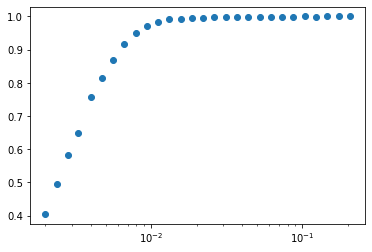

In [42]:
plt.scatter(acclist[np.argsort(acclist[:,0])][:,0],acclist[np.argsort(acclist[:,0])][:,1])
plt.xscale('log')

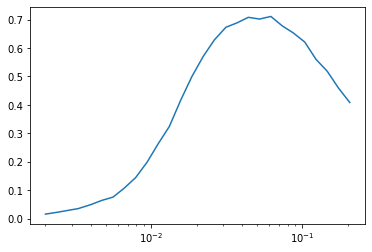

In [44]:
plt.plot(acclist2[np.argsort(acclist2[:,0])][:,0],acclist2[np.argsort(acclist2[:,0])][:,1])
plt.xscale('log')

In [57]:
import glob
Xfiles=glob.glob('/het/p4/rw484/MuonE/*_X.csv')
acclist=[]
acclist2=[]
for file in Xfiles:
    mXtry=float(file.split('/')[-1].split('_')[0].strip('mev'))
    Xdata=np.loadtxt(file,delimiter=',',skiprows=1)
    
    px=Xdata[:,1]*np.cos(Xdata[:,2])
    py=Xdata[:,1]*np.sin(Xdata[:,2])
    pz=Xdata[:,1]*np.sinh(Xdata[:,3])
    Xdata2=np.dstack((Xdata[:,0],px,py,pz))[0]
    
    for log10eps in np.linspace(-6,-2,10):
        eps=10**log10eps
        print(mXtry,eps)
        Ldecay=np.random.exponential(scale=DecayLength(eps,Xdata[:,0],mXtry))

        Ldecay_invol=Ldecay[(Ldecay>20) & (Ldecay<145)]
        X_invol=Xdata2[(Ldecay>20) & (Ldecay<145)]


        ecostheta=np.random.uniform(size=len(Ldecay_invol),low=-1,high=1)
        ephi=np.random.uniform(size=len(Ldecay_invol),low=0,high=2*np.pi)
        esintheta=np.sqrt(1-ecostheta**2)

        epx=(mXtry/2)*np.cos(ephi)*esintheta
        epy=(mXtry/2)*np.sin(ephi)*esintheta
        epz=(mXtry/2)*ecostheta
        eE=mXtry/2*np.ones(len(ecostheta))


    #    elabframe=np.empty((0,4))
    #    elabframe2=np.empty((0,4))
        passQlist=[]
        passQ2list=[]
        for ii in range(len(X_invol)):
            elabframe=boost(np.array([eE[ii],epx[ii],epy[ii],epz[ii]]),X_invol[ii][1:]/X_invol[ii][0])
            elabframe2=boost(np.array([eE[ii],-epx[ii],-epy[ii],-epz[ii]]),X_invol[ii][1:]/X_invol[ii][0])
    #        
    #        elabframe=np.concatenate((elabframe,\
    #                .reshape((1,4))))
    #        elabframe2=np.concatenate((elabframe2,\
    #                .reshape((1,4))))

            passQ=(np.sqrt(elabframe[1]**2+elabframe[2]**2)/elabframe[3]<5/(100-Ldecay_invol[ii]/10)) & \
            (np.sqrt(elabframe2[1]**2+elabframe2[2]**2)/elabframe2[3]<5/(100-Ldecay_invol[ii]/10))

            passQ2=0
            for jj in range(40):
                passQ2+=(np.sqrt(elabframe[1]**2+elabframe[2]**2)/elabframe[3]<5/(4000-jj*100)) & \
            (np.sqrt(elabframe2[1]**2+elabframe2[2]**2)/elabframe2[3]<5/(4000-jj*100))
            passQ2=passQ2/40
            passQlist.append(passQ)
            passQ2list.append(passQ2)
        if(len(passQlist)>0):
            acceptance=sum(passQlist)/len(passQlist)
            print(acceptance)
            acclist.append([mXtry,eps,sum(passQlist),len(passQlist)])

        if(len(passQ2list)>0):
            acceptance2=sum(passQ2list)/len(passQ2list)
            print(acceptance2)
            acclist2.append([mXtry,eps,sum(passQ2list),len(passQ2list)])
            
            

0.002 1e-06
0.017857142857142856
0.00044642857142857147
0.002 2.782559402207126e-06
0.007142857142857143
0.0002380952380952381
0.002 7.742636826811277e-06
0.004757373929590866
0.00012686330478908975
0.002 2.1544346900318823e-05
0.006337524276806706
0.00017504855361341075
0.002 5.994842503189409e-05
0.01230390006475737
0.0003096864489983518
0.002 0.0001668100537200059
0.11021093000958773
0.003378475551294303
0.002 0.00046415888336127773
0.6127196238554813
0.028878990348924077
0.002 0.0012915496650148827
0.9965870307167235
0.18105802047781597
0.002 0.003593813663804626


/cms/base/Miniconda/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


0.9611650485436893
0.6766990291262136
0.002 0.01
1.0
0.9750000000000001
0.004 1e-06
0.0
0.0
0.004 2.782559402207126e-06
0.01415929203539823
0.0003982300884955753
0.004 7.742636826811277e-06
0.011464055409601147
0.00040601862909004044
0.004 2.1544346900318823e-05
0.017375886524822696
0.0004895587076438168
0.004 5.994842503189409e-05
0.03852395829106991
0.0010985109749665017
0.004 0.0001668100537200059
0.30425894378194207
0.011293015332198283
0.004 0.00046415888336127773
0.9065217391304348
0.08994565217391423
0.004 0.0012915496650148827
0.9932279909706546
0.5010158013544018
0.004 0.003593813663804626
0.9787234042553191
0.8792553191489361
0.004 0.01
0.0024 1e-06
0.018518518518518517
0.000462962962962963
0.0024 2.782559402207126e-06
0.016771488469601678
0.00041928721174004196
0.0024 7.742636826811277e-06
0.005305039787798408
0.0001105216622458002
0.0024 2.1544346900318823e-05
0.008056537102473497
0.00023557126030624247
0.0024 5.994842503189409e-05
0.017031479299725098
0.0004738430375560622

0.146 1e-06
0.9545454545454546
0.20189393939393943
0.146 2.782559402207126e-06
0.985663082437276
0.18637992831541217
0.146 7.742636826811277e-06
0.986822840409956
0.20577110785749086
0.146 2.1544346900318823e-05
0.9865045052325346
0.21901996040244295
0.146 5.994842503189409e-05
0.9910507977260223
0.3019635980194331
0.146 0.0001668100537200059
0.9977795400475813
0.4467386994448861
0.146 0.00046415888336127773
1.0
0.6333333333333333
0.146 0.0012915496650148827
0.146 0.003593813663804626
0.146 0.01
0.0157 1e-06
0.1276595744680851
0.003457446808510639
0.0157 2.782559402207126e-06
0.11695137976346912
0.0038436268068331113
0.0157 7.742636826811277e-06
0.12153024911032029
0.0030604982206405814
0.0157 2.1544346900318823e-05
0.1475796198095947
0.004223648711508259
0.0157 5.994842503189409e-05
0.2787617050432905
0.010579698108505054
0.0157 0.0001668100537200059
0.8460442833095947
0.10379709957270053
0.0157 0.00046415888336127773
1.0
0.6073265550239224
0.0157 0.0012915496650148827
1.0
0.896114864

In [58]:
acclist

[[0.002, 1e-06, 1, 56],
 [0.002, 2.782559402207126e-06, 3, 420],
 [0.002, 7.742636826811277e-06, 15, 3153],
 [0.002, 2.1544346900318823e-05, 124, 19566],
 [0.002, 5.994842503189409e-05, 589, 47871],
 [0.002, 0.0001668100537200059, 2299, 20860],
 [0.002, 0.00046415888336127773, 2476, 4041],
 [0.002, 0.0012915496650148827, 584, 586],
 [0.002, 0.003593813663804626, 99, 103],
 [0.002, 0.01, 13, 13],
 [0.004, 1e-06, 0, 84],
 [0.004, 2.782559402207126e-06, 8, 565],
 [0.004, 7.742636826811277e-06, 48, 4187],
 [0.004, 2.1544346900318823e-05, 441, 25380],
 [0.004, 5.994842503189409e-05, 1899, 49294],
 [0.004, 0.0001668100537200059, 4465, 14675],
 [0.004, 0.00046415888336127773, 2085, 2300],
 [0.004, 0.0012915496650148827, 440, 443],
 [0.004, 0.003593813663804626, 92, 94],
 [0.0024, 1e-06, 1, 54],
 [0.0024, 2.782559402207126e-06, 8, 477],
 [0.0024, 7.742636826811277e-06, 18, 3393],
 [0.0024, 2.1544346900318823e-05, 171, 21225],
 [0.0024, 5.994842503189409e-05, 824, 48381],
 [0.0024, 0.0001668100

In [59]:
acclist=np.array(acclist)

In [50]:
xsecs=np.loadtxt('vec_xsec.txt',skiprows=1)

In [51]:
xsecdict={}
for m,x in xsecs:
    xsecdict[m]=x

In [60]:
Nevlist=[]
for m,eps,Npass,_ in acclist:
    sigma=xsecdict[m]
    Nev=sigma*1.5e-4*Npass/100000
    Nevlist.append([m,eps,Nev])

In [64]:
np.savetxt('Nevlist_test.csv',Nevlist,delimiter=',')

In [65]:
xsecdict.keys()

dict_keys([0.002, 0.0024, 0.0028, 0.0033, 0.004, 0.0047, 0.0056, 0.0066, 0.0079, 0.0094, 0.0111, 0.0132, 0.0157, 0.0186, 0.0221, 0.0262, 0.0312, 0.037, 0.0439, 0.0521, 0.0619, 0.0735, 0.0872, 0.1036, 0.123, 0.146, 0.1733, 0.2057, 0.2443, 0.29])

In [97]:
import glob
Xfiles=glob.glob('/het/p4/rw484/MuonE/*_X.csv')
acclist=[]
acclist2=[]
for file in Xfiles:
    mXtry=float(file.split('/')[-1].split('_')[0].strip('mev'))
    if mXtry!=0.0132:
        continue
    Xdata=np.loadtxt(file,delimiter=',',skiprows=1)
    
    px=Xdata[:,1]*np.cos(Xdata[:,2])
    py=Xdata[:,1]*np.sin(Xdata[:,2])
    pz=Xdata[:,1]*np.sinh(Xdata[:,3])
    Xdata2=np.dstack((Xdata[:,0],px,py,pz))[0]
    
    for log10eps in np.linspace(-7,-2,20):
        eps=10**log10eps
        print(mXtry,eps)
        Ldecay=np.random.exponential(scale=DecayLength(eps,Xdata[:,0],mXtry))

        Ldecay_invol=Ldecay[(Ldecay>20) & (Ldecay<145)]
        X_invol=Xdata2[(Ldecay>20) & (Ldecay<145)]


        ecostheta=np.random.uniform(size=len(Ldecay_invol),low=-1,high=1)
        ephi=np.random.uniform(size=len(Ldecay_invol),low=0,high=2*np.pi)
        esintheta=np.sqrt(1-ecostheta**2)

        epx=(mXtry/2)*np.cos(ephi)*esintheta
        epy=(mXtry/2)*np.sin(ephi)*esintheta
        epz=(mXtry/2)*ecostheta
        eE=mXtry/2*np.ones(len(ecostheta))


    #    elabframe=np.empty((0,4))
    #    elabframe2=np.empty((0,4))
        passQlist=[]
        passQ2list=[]
        for ii in range(len(X_invol)):
            elabframe=boost(np.array([eE[ii],epx[ii],epy[ii],epz[ii]]),X_invol[ii][1:]/X_invol[ii][0])
            elabframe2=boost(np.array([eE[ii],-epx[ii],-epy[ii],-epz[ii]]),X_invol[ii][1:]/X_invol[ii][0])
#            if np.max(np.abs(elabframe+elabframe2-X_invol[ii]))>1e-5:
#                print('Error!',np.max(np.abs(elabframe+elabframe2-X_invol[ii])))
    #        
    #        elabframe=np.concatenate((elabframe,\
    #                .reshape((1,4))))
    #        elabframe2=np.concatenate((elabframe2,\
    #                .reshape((1,4))))
            costhetaee=np.sum(elabframe[1:]*elabframe2[1:])/\
                np.sqrt(np.sum(elabframe[1:]**2)*np.sum(elabframe2[1:]**2))
            passQ=(np.sqrt(elabframe[1]**2+elabframe[2]**2)/elabframe[3]<5/(100-Ldecay_invol[ii]/10)) & \
            (np.sqrt(elabframe2[1]**2+elabframe2[2]**2)/elabframe2[3]<5/(100-Ldecay_invol[ii]/10)) &\
            (X_invol[ii][0]>1) & (costhetaee<np.cos(0.1e-3))\
            
#            (elabframe[0]>1) & (elabframe2[0]>1)

            passQ2=0
            for jj in range(40):
                passQ2+=(np.sqrt(elabframe[1]**2+elabframe[2]**2)/elabframe[3]<5/(4000-jj*100)) & \
            (np.sqrt(elabframe2[1]**2+elabframe2[2]**2)/elabframe2[3]<5/(4000-jj*100))
            passQ2=passQ2/40
            passQlist.append(passQ)
            passQ2list.append(passQ2)
            
        if(len(passQlist)>0):
            acceptance=sum(passQlist)/len(passQlist)
            print(acceptance)
            acclist.append([mXtry,eps,sum(passQlist),len(passQlist)])

        if(len(passQ2list)>0):
            acceptance2=sum(passQ2list)/len(passQ2list)
            print(acceptance2)
            acclist2.append([mXtry,eps,sum(passQ2list),len(passQ2list)])
            
            

0.0132 1e-07
0.0
0.0
0.0132 1.8329807108324375e-07
0.0
0.0
0.0132 3.359818286283781e-07
0.0
0.0
0.0132 6.158482110660267e-07
0.0
0.0016666666666666668
0.0132 1.1288378916846883e-06
0.0078125
0.001953125
0.0132 2.06913808111479e-06
0.004819277108433735
0.0018674698795180732
0.0132 3.7926901907322535e-06
0.017011834319526627
0.0029215976331360897
0.0132 6.951927961775606e-06
0.013563771603587836
0.0021822358346095046
0.0132 1.274274985703132e-05
0.016605032267420782
0.00284062069465589
0.0132 2.3357214690901213e-05
0.020185628060585353
0.003036385377519735
0.0132 4.281332398719396e-05
0.03917225083531779
0.005134666149785191
0.0132 7.847599703514606e-05


/cms/base/Miniconda/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


0.12456245898052942
0.013338848173264748
0.0132 0.0001438449888287663
0.4680550653018002
0.05145605365336783
0.0132 0.00026366508987303583
0.9174126479930695
0.20854028299162444
0.0132 0.0004832930238571752
0.9966931216931217
0.5404596560846562
0.0132 0.0008858667904100823
0.9956647398843931
0.8001083815028897
0.0132 0.001623776739188721
0.9895287958115183
0.8967277486910992
0.0132 0.002976351441631319
1.0
1.0
0.0132 0.005455594781168515
0.0132 0.01


In [98]:
acclist=np.array(acclist)

Text(0.5, 1.0, 'mX=0.0132 GeV')

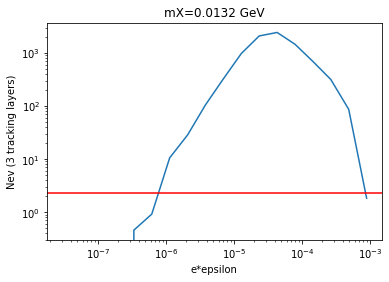

In [99]:
plt.plot(0.3*acclist[:,1],acclist[:,2]/100000*1.5e-4*xsecdict[0.0132])
plt.xscale('log')
plt.axhline(2.3,color='r')
plt.yscale('log')
plt.xlabel('e*epsilon')
plt.ylabel('Nev (3 tracking layers)')
plt.title('mX=0.0132 GeV')